In [37]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [38]:
# read the raw csv file(/s)
movie_file = ("Resources/movies_metadata.csv")

In [39]:
#read the movie file and create a dataframe

movie_data_df = pd.read_csv(movie_file)

#list the column types
movie_data_df.dtypes


adult                     object
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [40]:
#cleanup and filter steps ( budget, revenue , release year)

movie_data_df = movie_data_df.drop(columns=['adult', 'production_countries','belongs_to_collection','homepage','id','imdb_id','overview','poster_path','runtime','spoken_languages','tagline','original_title','video'])

print( f'Inital count of data from file: {len(movie_data_df)}')

clean_movie_data_df = movie_data_df.loc[movie_data_df["budget"] != 0  ]
print( f'count after filtering out $0 budget: {len(clean_movie_data_df)}')

clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df["revenue"] != 0  ]
print( f'count after filtering out $0 revenue: {len(clean_movie_data_df)}')

clean_movie_data_df['release_year']= pd.to_datetime(clean_movie_data_df["release_date"]).dt.year 
clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df["release_year"] < 2019 ]
print( f'count after filtering out movies in future date: {len(clean_movie_data_df)}')

clean_movie_data_df['net_loss_profit'] = clean_movie_data_df["revenue"] - clean_movie_data_df["budget"]



Inital count of data from file: 45291
count after filtering out $0 budget: 8886
count after filtering out $0 revenue: 5381
count after filtering out movies in future date: 5364


In [41]:
# extract the Genre from the column that has a list of dictionaries
clean_movie_data_df['Primary Genre']=[json.loads(row.genres.replace("'",'"'))[0]['name'] if row.genres != '[]' else '' for _,row in clean_movie_data_df.iterrows()]
print(clean_movie_data_df[['net_loss_profit','Primary Genre', 'release_year', 'title']])



       net_loss_profit    Primary Genre  release_year  \
0          343554033.0        Animation          1995   
1          197797249.0        Adventure          1995   
3           65452156.0           Comedy          1995   
5          127436818.0           Action          1995   
8           29350171.0           Action          1995   
9          294194034.0        Adventure          1995   
10          45879496.0           Comedy          1995   
13         -30318235.0          History          1995   
14         -87982678.0           Action          1995   
15          64112375.0            Drama          1995   
16         118500000.0            Drama          1995   
17            300000.0            Crime          1995   
18         182385533.0            Crime          1995   
19         -24568887.0           Action          1995   
20          84851622.0           Comedy          1995   
22         -19696928.0           Action          1995   
24          46200000.0         

In [42]:
print(clean_movie_data_df.dtypes)

# convert number columns: revenue, budget, net_loss_profit to numeric for sorting purposes
clean_movie_data_df['revenue'] = pd.to_numeric(clean_movie_data_df['revenue'])
clean_movie_data_df['budget'] = pd.to_numeric(clean_movie_data_df['budget'])
clean_movie_data_df['net_loss_profit'] = pd.to_numeric(clean_movie_data_df['net_loss_profit'])
print(clean_movie_data_df.dtypes )
# sorting movie by revenue from highest to lowest
# sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)
sort_by_netProfit = clean_movie_data_df.sort_values(by='net_loss_profit', ascending = False)

# output csv file sort by revenue data
sort_by_revenue.to_csv("revenue.csv", encoding='utf-8')

# print to terminal
sort_by_revenue.head(10)

budget                    int64
genres                   object
original_language        object
popularity               object
production_companies     object
release_date             object
revenue                 float64
status                   object
title                    object
vote_average            float64
vote_count              float64
release_year              int64
net_loss_profit         float64
Primary Genre            object
dtype: object
budget                    int64
genres                   object
original_language        object
popularity               object
production_companies     object
release_date             object
revenue                 float64
status                   object
title                    object
vote_average            float64
vote_count              float64
release_year              int64
net_loss_profit         float64
Primary Genre            object
dtype: object


,budget,genres,original_language,popularity,production_companies,release_date,revenue,status,title,vote_average,vote_count,release_year,net_loss_profit,Primary Genre
14528,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,185.071,"[{'name': 'Ingenious Film Partners', 'id': 289...",12/10/2009,2.787965e+09,Released,Avatar,7.2,12114.0,2009,2.550965e+09,Action
26484,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,31.626,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...",12/15/2015,2.068224e+09,Released,Star Wars: The Force Awakens,7.5,7993.0,2015,1.823224e+09,Action
1637,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,26.8891,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",11/18/1997,1.845034e+09,Released,Titanic,7.5,7770.0,1997,1.645034e+09,Drama
17782,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,89.8876,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",4/25/2012,1.519558e+09,Released,The Avengers,7.4,12000.0,2012,1.299558e+09,Science Fiction
25016,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,32.7905,"[{'name': 'Universal Studios', 'id': 13}, {'na...",6/9/2015,1.513529e+09,Released,Jurassic World,6.5,8842.0,2015,1.363529e+09,Action
28754,190000000,"[{'id': 28, 'name': 'Action'}]",en,27.2757,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",4/1/2015,1.506249e+09,Released,Furious 7,7.3,4253.0,2015,1.316249e+09,Action
26487,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,37.3794,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",4/22/2015,1.405404e+09,Released,Avengers: Age of Ultron,7.3,6908.0,2015,1.125404e+09,Action
17401,125000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,24.9907,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",7/7/2011,1.342000e+09,Released,Harry Potter and the Deathly Hallows: Part 2,7.9,6141.0,2011,1.217000e+09,Family
22054,150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,24.2482,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",11/27/2013,1.274219e+09,Released,Frozen,7.3,5440.0,2013,1.124219e+09,Animation
42070,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,287.253654,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",3/16/2017,1.262886e+09,Released,Beauty and the Beast,6.8,5530.0,2017,1.102886e+09,Family


In [43]:
top_10_profitable_mv = sort_by_revenue[:10][['title','net_loss_profit','Primary Genre']].reset_index()

print(top_10_profitable_mv)

# bar graph


   index                                         title  net_loss_profit  \
0  14528                                        Avatar     2.550965e+09   
1  26484                  Star Wars: The Force Awakens     1.823224e+09   
2   1637                                       Titanic     1.645034e+09   
3  17782                                  The Avengers     1.299558e+09   
4  25016                                Jurassic World     1.363529e+09   
5  28754                                     Furious 7     1.316249e+09   
6  26487                       Avengers: Age of Ultron     1.125404e+09   
7  17401  Harry Potter and the Deathly Hallows: Part 2     1.217000e+09   
8  22054                                        Frozen     1.124219e+09   
9  42070                          Beauty and the Beast     1.102886e+09   

     Primary Genre  
0           Action  
1           Action  
2            Drama  
3  Science Fiction  
4           Action  
5           Action  
6           Action  
7     

TypeError: 'DataFrame' object cannot be interpreted as an integer

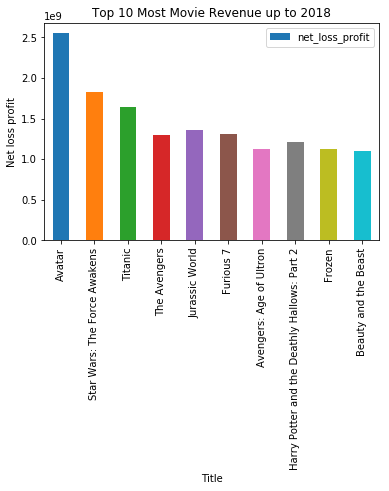

In [62]:
ax = top_10_profitable_mv.plot.bar(x='title', y='net_loss_profit', rot = 90)

x_axis = np.arange(len(top_10_profitable_mv))

tick_locations = [value for value in x_axis]

ax.set_title('Top 10 Most Movie Revenue up to 2018')
ax.set_xlabel('Title')
ax.set_ylabel('Net loss profit')

# ax.text(set_xlabel,set_ylabel, "String", fontsize=12)

for i in range(top_10_profitable_mv):
    plt.text(x = top_10_profitable_mv[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)


# plt.xticks(tick_locations, top_10_profitable_mv["net_loss_profit"], rotation = "vertical")

plt.show()
plt.tight_layout()


# ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#             ha='center', va='bottom')

# x_labels = [108300.0, 110540.0, 112780.0, 115020.0, 117260.0, 119500.0, 
#             121740.0, 123980.0, 126220.0, 128460.0, 130700.0]
# # ax.set_xticklabels(x_labels)
# ax.text(x_labels)




